In [43]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [44]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [45]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [46]:
df.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [48]:
df.describe(include='float')

,height,age,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000
mean,181.240353,26.041903,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881
std,6.969818,4.777629,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.000000,22.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000
50%,181.240353,26.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000
75%,186.000000,29.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000
max,206.000000,43.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000


In [49]:
df.describe(include='int')

,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,36.407011,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,26.526541,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,12.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,35.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,59.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,107.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [50]:
df.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/alexander-badolato/profil/spieler/957230,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [51]:
df.groupby(['name', 'team'])[['name', 'team']].count()

,,name,team
name,team,,
AJ Marcucci,New York Red Bulls,1,1
Aaron Appindangoyé,Sivasspor,1,1
Aaron Boupendza,Al-Shabab Club (Riyadh),1,1
Aaron Calver,Gwangju FC,1,1
Aaron Connolly,Hull City,1,1
...,...,...,...
Ömer Beyaz,VfB Stuttgart,1,1
Ömer Toprak,Antalyaspor,1,1
Örjan Nyland,RB Leipzig,1,1


In [52]:
df.drop(["player"],axis=1,inplace=True)

In [53]:
df.drop(["clean sheets"],axis=1,inplace=True)

In [54]:
df.drop(["goals conceded"],axis=1,inplace=True)

In [55]:
df.drop(df[df['position_encoded'] == 1].index, inplace=True)

In [56]:
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [59]:
#Display number missing values per column
df.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [60]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [61]:
# check columns types 
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [62]:
df['age'] = df['age'].astype('int64')

In [63]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.028090,0.056180,0.224719,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.017889,0.017889,0.053667,0.0,0.0,5031,238,51,21,40000000,80000000,2,0


In [64]:
df['winger'] = df['winger'].replace({1: True, 0: False})

In [65]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.028090,0.056180,0.224719,0.0,0.0,6408,175,22,9,50000000,50000000,2,False
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.017889,0.017889,0.053667,0.0,0.0,5031,238,51,21,40000000,80000000,2,False


In [66]:
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                      int64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                    bool
dtype: object

In [67]:
# go to clean them 

In [68]:
# check outliers 

### Correcting errors

-------------------

In [69]:
df.rename(columns={
    'current_value': 'Valuated_price (Euro)',
    'highest_value': 'Highest_valuated_price (Euro)'
}, inplace=True)

In [70]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [71]:
df.dtypes

team                              object
name                              object
position                          object
height                           float64
age                                int64
appearance                         int64
goals                            float64
assists                          float64
yellow cards                     float64
second yellow cards              float64
red cards                        float64
minutes played                     int64
days_injured                       int64
games_injured                      int64
award                              int64
Valuated_price (Euro)              int64
Highest_valuated_price (Euro)      int64
position_encoded                   int64
winger                              bool
dtype: object

In [72]:
categorical_features = ['team', 'position', 'position_encoded', 'winger']
numeric_features = ['age', 'appearance', 'red cards', 'minutes played', 'days_injured']

In [73]:
filtered_df = df[(df['height'] >= 165) & 
                  (df['height'] <= 195)]

fig = px.histogram(filtered_df, 
                   x='height', 
                   labels={'height': 'height'},
                   nbins=100)

fig.show()

In [74]:
df = df[(df['height'] >= 165) & (df['height'] <= 195)]

In [75]:
df.shape

(9402, 19)

In [76]:
filtered_df = df[(df['age'] >= 17) & 
                  (df['age'] <= 38)]

fig = px.histogram(filtered_df, 
                   x='age', 
                   labels={'age': 'age'},
                   nbins=100)

fig.show()

In [77]:
df = df[(df['age'] >= 17) & (df['age'] <= 38)]

In [78]:
df.shape

(9360, 19)

In [79]:
fig = px.box(df, y = 'Highest_valuated_price (Euro)')
fig.show()

In [80]:
filtered_df = df[(df['Highest_valuated_price (Euro)'] > 450000) & 
                  (df['Highest_valuated_price (Euro)'] <= 20000000)]

fig = px.histogram(filtered_df, 
                   x='Highest_valuated_price (Euro)', 
                   labels={'Highest_valuated_price (Euro)': 'Highest_valuated_price (Euro)'},
                   nbins=100)

fig.show()

In [81]:
df = df[(df['Highest_valuated_price (Euro)'] > 450000) & (df['Highest_valuated_price (Euro)'] <= 20000000)]

In [82]:
df.shape

(6419, 19)

In [83]:
fig = px.box(df, y = 'Valuated_price (Euro)')
fig.show()

In [84]:
filtered_df = df[(df['Valuated_price (Euro)'] >= 450000) & 
                  (df['Valuated_price (Euro)'] <= 200000000)]

fig = px.histogram(filtered_df, 
                   x='Valuated_price (Euro)', 
                   labels={'Valuated_price (Euro)': 'Valuated Price (Euro)'},
                   nbins=100)

fig.show()

In [85]:
df = df[(df['Valuated_price (Euro)'] >= 450000) & (df['Valuated_price (Euro)'] <= 20000000)]

In [86]:
df.shape

(5591, 19)

2.Feature engineering

In [87]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,Valuated_price (Euro),Highest_valuated_price (Euro),position_encoded,winger
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31,8,0.0,0.0,0.216346,0.0,0.0,416,932,169,7,2000000,20000000,2,False
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21,34,0.0,0.0,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,False


In [88]:
categorical_features

['team', 'position', 'position_encoded', 'winger']

In [89]:
df.drop(["name"],axis=1,inplace=True)

In [90]:
df = pd.get_dummies(df, columns=categorical_features)

In [91]:
df.shape

(5591, 407)

3. Feature selection

In [92]:
correlation = df.corr()
print(correlation['Valuated_price (Euro)'].sort_values(ascending=False))

Valuated_price (Euro)            1.000000
Highest_valuated_price (Euro)    0.763321
minutes played                   0.329543
appearance                       0.327191
team_Stade Rennais FC            0.112234
                                   ...   
team_Gamba Osaka                -0.034045
team_Jeonbuk Hyundai Motors     -0.034222
team_Portimonense SC            -0.036223
team_Mamelodi Sundowns FC       -0.038615
age                             -0.188506
Name: Valuated_price (Euro), Length: 407, dtype: float64


In [93]:
threshold = 0.1# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['Valuated_price (Euro)']) > threshold]['Valuated_price (Euro)'].index
selected_features

Index(['age', 'appearance', 'goals', 'minutes played', 'award',
       'Valuated_price (Euro)', 'Highest_valuated_price (Euro)',
       'team_AFC Bournemouth', 'team_Brentford FC',
       'team_Brighton &amp; Hove Albion', 'team_Leeds United',
       'team_Olympique Marseille', 'team_Southampton FC',
       'team_Stade Rennais FC'],
      dtype='object')

In [94]:
selected_features = ['age', 'appearance', 'goals', 'minutes played', 'award',
       'Valuated_price (Euro)', 'Highest_valuated_price (Euro)',
       'team_AFC Bournemouth', 'team_Brentford FC',
       'team_Brighton &amp; Hove Albion', 'team_Leeds United',
       'team_Olympique Marseille', 'team_Southampton FC',
       'team_Stade Rennais FC']

In [95]:
df = df[selected_features]
df.head()

,age,appearance,goals,minutes played,award,Valuated_price (Euro),Highest_valuated_price (Euro),team_AFC Bournemouth,team_Brentford FC,team_Brighton &amp; Hove Albion,team_Leeds United,team_Olympique Marseille,team_Southampton FC,team_Stade Rennais FC
7,31,8,0.000000,416,7,2000000,20000000,False,False,False,False,False,False,False
8,21,34,0.000000,2758,0,2000000,2000000,False,False,False,False,False,False,False
11,22,34,0.000000,2686,1,10000000,12000000,False,False,False,False,False,False,False
20,20,39,0.129125,2788,1,800000,800000,False,False,False,False,False,False,False
21,18,51,0.153759,3512,1,800000,800000,False,False,False,False,False,False,False


4. Prepare train and test data

In [96]:
# Prepare data
X = df.drop(['Valuated_price (Euro)'], axis=1)
y = df['Valuated_price (Euro)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
X.shape

(5591, 13)

Buliding the Model

In [98]:
model = LinearRegression()

In [99]:
ridge_model = Ridge()

In [100]:
lasso_model = Lasso()

In [101]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

Train the Model

In [102]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [103]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 1}
Best Parameters for lasso model: {'alpha': 5}


Test the Model

In [104]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

Interpretation of the Model

In [105]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [106]:
coeff_df

,Coefficient
age,-1.023472e+06
appearance,-1.004120e+06
goals,1.872307e+05
minutes played,1.500621e+06
award,-1.010678e+05
Highest_valuated_price (Euro),2.657128e+06
team_AFC Bournemouth,1.069060e+05
team_Brentford FC,2.120513e+05
team_Brighton &amp; Hove Albion,1.244878e+05
team_Leeds United,7.859014e+04


In [107]:
coeff_df_ridge

,Coefficient
age,-1.022878e+06
appearance,-9.984356e+05
goals,1.867198e+05
minutes played,1.495137e+06
award,-1.009988e+05
Highest_valuated_price (Euro),2.656131e+06
team_AFC Bournemouth,1.070002e+05
team_Brentford FC,2.120427e+05
team_Brighton &amp; Hove Albion,1.245387e+05
team_Leeds United,7.861581e+04


In [108]:
coeff_df_lasso

,Coefficient
age,-1.023465e+06
appearance,-1.004027e+06
goals,1.872170e+05
minutes played,1.500532e+06
award,-1.010633e+05
Highest_valuated_price (Euro),2.657120e+06
team_AFC Bournemouth,1.069020e+05
team_Brentford FC,2.120461e+05
team_Brighton &amp; Hove Albion,1.244833e+05
team_Leeds United,7.858551e+04


In [109]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 2940908.510094557


In [110]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}")

 Ridge model intercept: 2940908.510094557


In [111]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}")

 Lasso model intercept: 2940908.510094557


Evaluating the Model

In [112]:
y_base = [y_train.mean()] * len(y_test)

In [113]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.330617e+13


In [114]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 3.739687e+12
Mean Squared Error for testing: 3.801525e+12


In [115]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 3.739691e+12
Mean Squared Error for testing ridge model: 3.801701e+12


In [116]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 3.739687e+12
Mean Squared Error for testing lasso model: 3.801529e+12


In [117]:
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base:2e}')

Mean Absolute  Error of base model: 2.469292e+06


In [118]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.329417e+06
Mean Absolute Error for testing: 1.336166e+06


In [119]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 1.329241e+06
Mean Absolute Error for testing ridge model: 1.336016e+06


In [120]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 1.329414e+06
Mean Absolute Error for testing lasso model: 1.336164e+06


In [121]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 1.571398e+03


In [122]:
# RMSE for Linear model
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 1.933827e+06
Root Mean Squared Error for testing: 1.949750e+06


In [123]:
# RMSE for Ridge model
print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 1.933828e+06
Root Mean Squared Error for testing ridge model: 1.949795e+06


In [124]:
# RMSE Lasso model
print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 1.933827e+06
Root Mean Squared Error for testing lasso model: 1.949751e+06


In [125]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7023948190824043
R Square for testing: 0.7136251079407271


In [126]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.702394469006566
R Square for testing ridge model: 0.713611848598526


In [127]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.7023948189828372
R Square for testing lasso model: 0.7136248516670267


In [128]:
predictions = model.predict(X_test_scaled)

In [129]:
Real_Values = np.array(y_test)

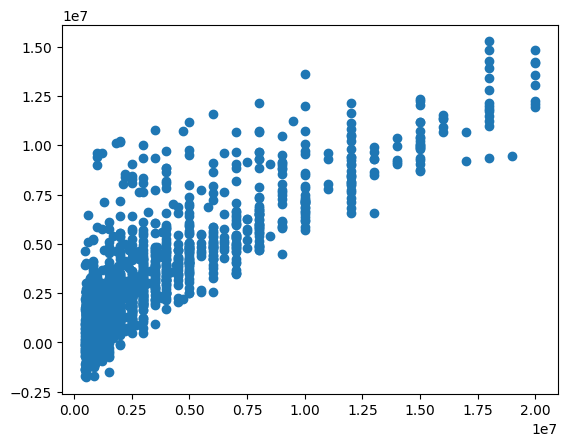

In [130]:
plt.scatter(Real_Values,predictions); 

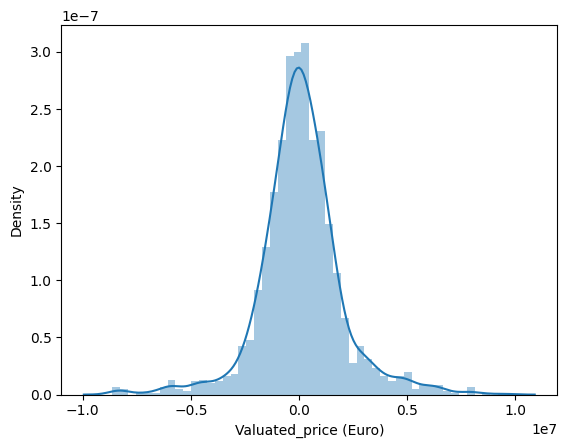

In [131]:
sns.distplot((y_test-predictions),bins=50); 